In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-video-game-sales/vgsales.csv


# Importing all the necessary libraries which will be helpful for our analysis such as Pandas, numpy, matplotlib,seaborn.
  

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
import matplotlib
import matplotlib.animation as animation


 - Here We are using the video games sales data from the kaggle dataset. We have read the csv file with the help  of the pandas module. by printing the dataframe we can see the data in the datset for our analysis.AS you can see we have Rank, Name, Platform, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales And Global_Sales.

- The description of the data  was already given in the columns section in dataset, Here I'm Providing again the description of each columns so that you can know about the data.

* Rank	Ranking of the game based on global sales. (Integer)
* Name	Name of the game. (String)
* Platform	Platform the game was released on. (String)
* Year	Year the game was released. (Integer)
* Genre	Genre of the game. (String)
* Publisher	Publisher of the game. (String)
* NA_Sales	Sales of the game in North America. (Float)
* EU_Sales	Sales of the game in Europe. (Float)
* JP_Sales	Sales of the game in Japan. (Float)
* Other_Sales	Sales of the game in other regions. (Float)
* Global_Sales	Total sales of the game worldwide. (Float)

In [3]:
df = pd.read_csv("/kaggle/input/global-video-game-sales/vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


- We have 16598 rows and 11 columns in the dataset. 

In [4]:
df.shape

(16598, 11)

# Data Cleaning
- By checking the null values we can find the null values in the dataset.AS we can see that there are 271 null values in the year column of data set and 58 null values in the Publisher column.

In [5]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Now we are removing the unwanted columns(null valued columns) because it can create problem in the data analysis process. Here we are using the **"df.dropna()"** for removing the null values from the dataset. After dropping the null values we can check again if any null values are remaining by calling the **"df1.isnull()"**.sum" whci will show thw null values in the dataset but as we can see that there are no none values in the data set we can move forward for the data analysis. We can see that the nukmber of rows ahas been decreased from 16598 to **16291**

In [6]:
df1 = df.dropna()
df1.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Rank   Name  Platform   Year  Genre  Publisher  NA_Sales  EU_Sales  \
0      False  False     False  False  False      False     False     False   
1      False  False     False  False  False      False     False     False   
2      False  False     False  False  False      False     False     False   
3      False  False     False  False  False      False     False     False   
4      False  False     False  False  False      False     False     False   
...      ...    ...       ...    ...    ...        ...       ...       ...   
16593  False  False     False  False  False      False     False     False   
16594  False  False     False  False  False      False     False     False   
16595  False  False     False  False  False      False     False     False   
16596  False  False     False  False  False      False     False     False   
16597  False  False     False  False  False      False     False     False   

 

In [7]:
df1.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Data Visualization
In the following given code we have imported the seaborn library for the data analysis process, Here we have created the barplot from the seaborn library as you can see we have taken the count of unique values of the Publisher column from the dataset as the pub_num. By applying the values in the barplot in the seaborn library, pub_num.index for the y and pub_num as x.By observing the visualization we ca see that there Electronics art is the biggest publishers among the video game sales.

The top 5 Publishers are:

1. Electronics Art
2. Activision
3. Namco Bundai Games 
4. Konami Digital Entertainments 
5. THQ

Total number of games by Publishers = 576


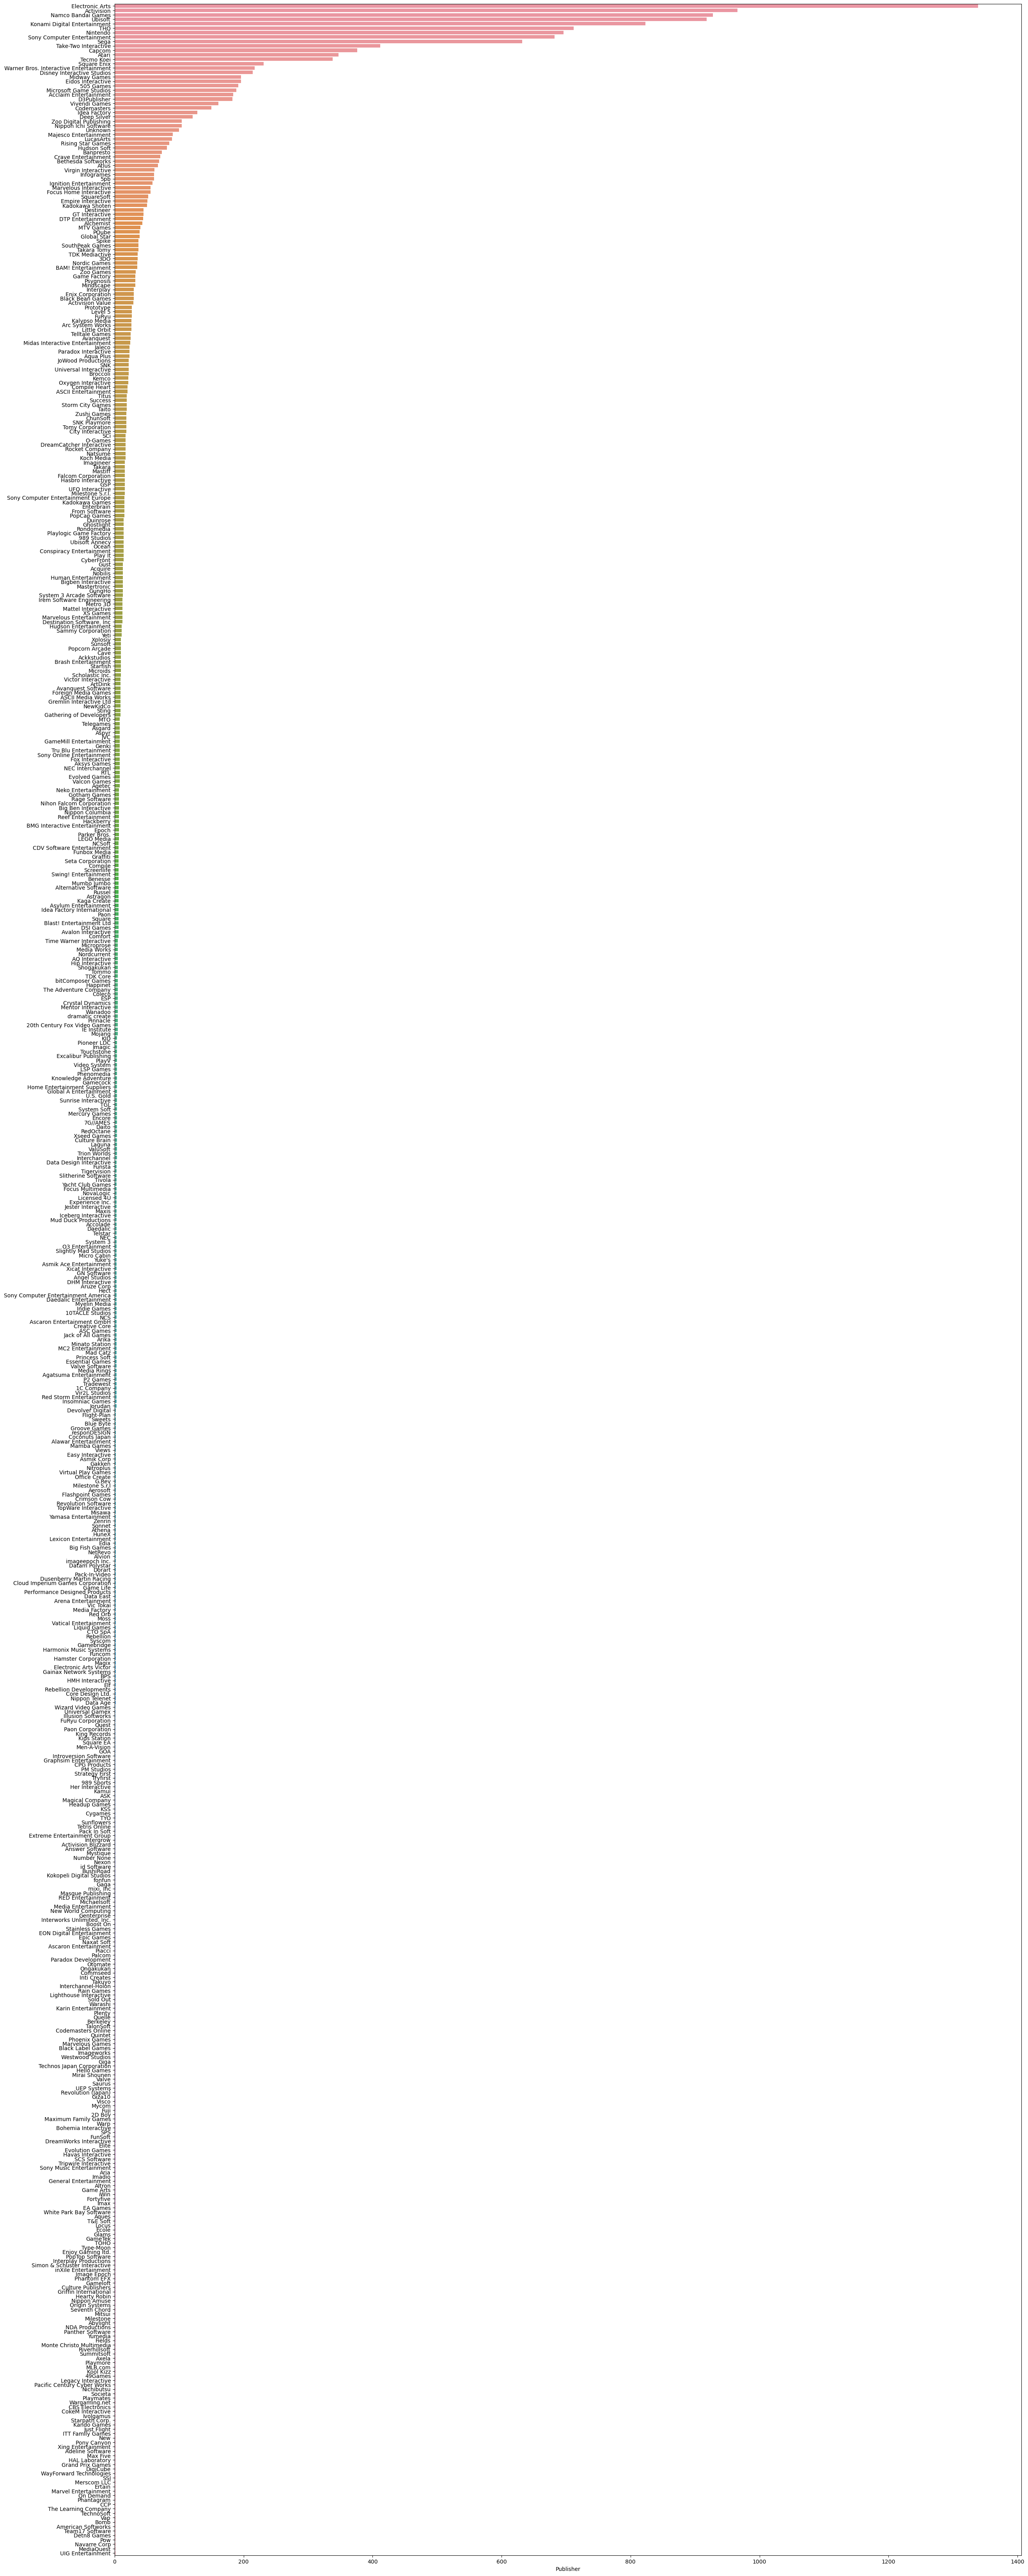

In [8]:
import seaborn as sns
pub_num = df1['Publisher'].value_counts()
print("Total number of games by Publishers =", (len(pub_num)))
plt.figure(figsize=(30,85))
chart = sns.barplot(y=pub_num.index, x=pub_num)
chart.set_yticklabels(chart.get_yticklabels())
plt.show()

Based on the Genre We have created the histogram or histplot with the help of the seaborn library as we have created the histogram we can see that there were low number of different genre games in the 1980's but as the time passed we can see that the types of the genres were increased by the time. The Year 2008-2009 were the top most year for the video game industry as they had the highest number of games released during that  tenure and with different genres.

<AxesSubplot:xlabel='Year', ylabel='Count'>

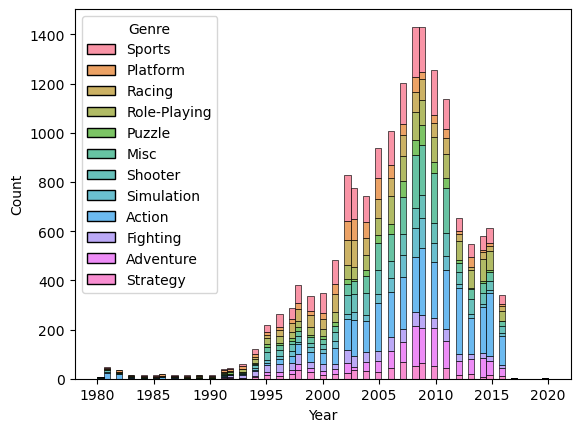

In [9]:
games = df1

sns.histplot(data=df1, x="Year", hue="Genre", multiple="stack")

In [10]:
#plt.figure(figsize=(15,7))
#sns.kdeplot(data=df1, x="Year", hue="Genre", multiple="stack")

As the following code is for the different Genres by year. we can see that there is different genres and different time period on the basis of that each genre is inceasing by time and have made the progress in the tenure betweeen 1980 to 2020

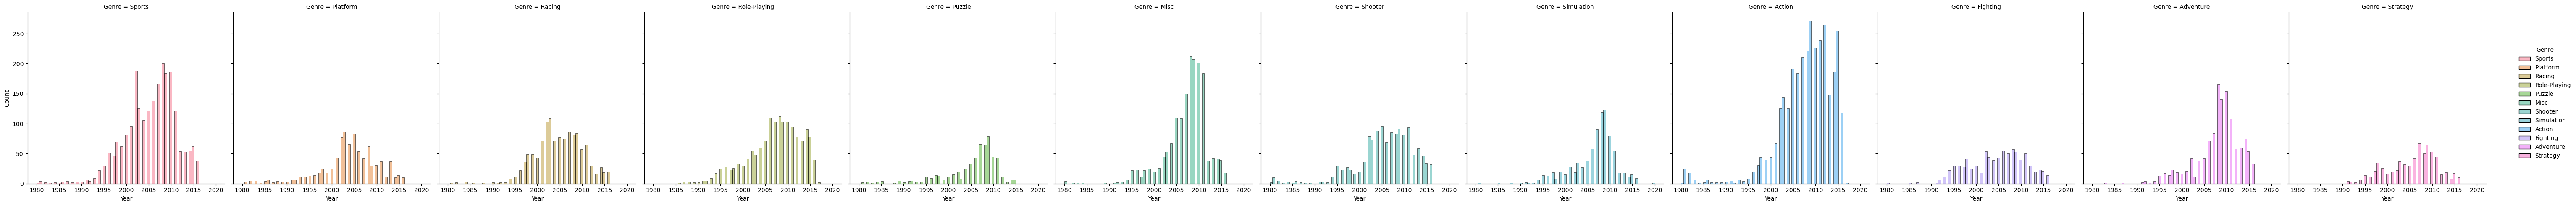

In [11]:
sns.displot(data=df1, x="Year", hue="Genre", col="Genre")

Following Code we can see that the Action is the most popular Genre on the basis of the data given.It is played the most and based on the analysis we can see that game in Action is tend to be more popular then the other genre games.

* TOP 5 Genres are:
1. Action
2. Sports
3. Misc
4. Role Playing 
5. Shooting

Graph for Industry: unique = 12


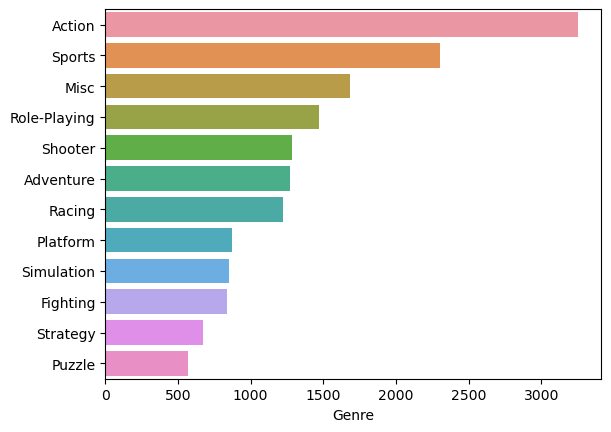

In [12]:
cat_num = df1['Genre'].value_counts()
print("Graph for Industry: unique =", (len(cat_num)))
#plt.figure(figsize=(30,85))
chart = sns.barplot(y=cat_num.index, x=cat_num)
chart.set_yticklabels(chart.get_yticklabels())
plt.show()

Following Code and Visualization is describing the Various Platforms and the count of games on the platform, and the with the highest number of games is on "DS" platform. 
* TOP 5 Platforms are:
1. DS
2. PS2
3. PS3
4. WII
5. X360

Graph for Industry: unique = 31


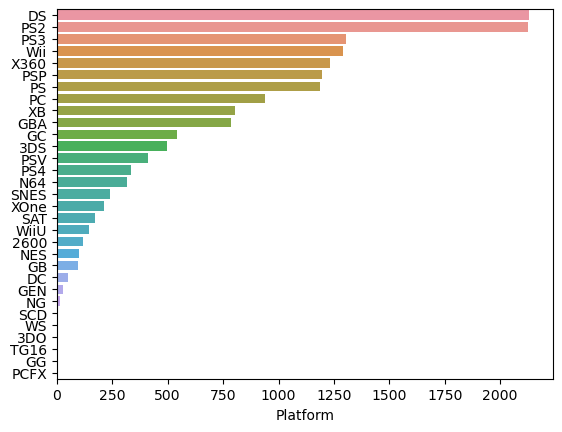

In [13]:
cat_num = df1['Platform'].value_counts()
print("Graph for Industry: unique =", (len(cat_num)))
#plt.figure(figsize=(30,85))
chart = sns.barplot(y=cat_num.index, x=cat_num)
chart.set_yticklabels(chart.get_yticklabels())
plt.show()

Based on the year of release of the games there are different time period where the different platfroms where doing the best and low performance, Based on the above given information lets check the top 5 platforms best and worst time period of their game release.

* TOP 5 Platforms are:
1. DS
    The Best time Period was 2008 & The Worst was 2014
2. PS2
    The Best time Period was 2002 & The Worst was 2011
3. PS3
    The Best time Period was 2011 & The Worst was 2006
4. WII
    The Best time Period was 2009 & The Worst was 2015
5. X360
    The Best time Period was 2011 & The Worst was 2016
    
As above given information it can be said that the every platforms had their own best growth rate and poor growth rate on the time period.
Each were growing and as the time passed there was downfall of each platfroms.

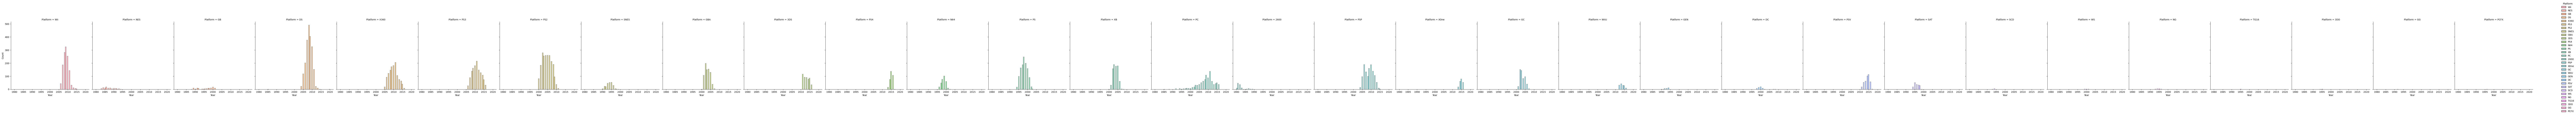

In [14]:
sns.displot(data=df1, x="Year", hue="Platform", col="Platform")


Follwing Code is for the knowing Which Genre Game is most released in each Platforms and how it can be helpful for creating the more games based on each genre in each platform let's see the which genre is most released in top 5 platfroms.
TOP 5 Platforms are:
1. DS
    The Best Genre is Misc 
2. PS2
    The Best Genre is Sports 
3. PS3
    The Best Genre is Action 
4. WII
    The Best Genre is Misc 
5. X360
    The Best Genre is Action 
Here the best describes the highest amount of game with highest genre released 

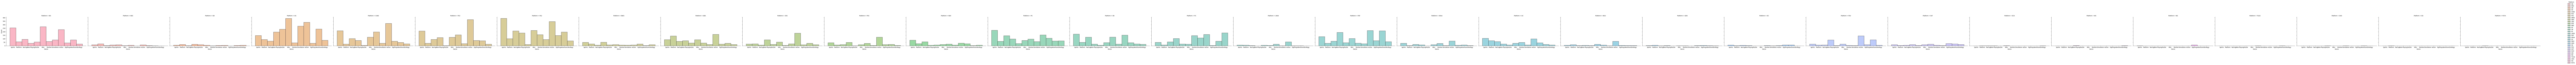

In [15]:

sns.displot(data=df1, x="Genre", hue="Platform", col="Platform",height=4, aspect=2.2)

Now Lets look at the north america sales data, Here we have taken the genre with north america game sales, which describes the popular games in the north america it describes the highest amount of game which where popular by sales data. As we can see that **Platform** Genre is more in demand in north america.
So comapanies or publishers can take these as note to relase platform based game more in north america if there is target is north america region.

* The TOP 5  popular games genre in north america is 

1. Platform 
2. Shooter
3. Sports 
4. Racing
5. Action 

Graph for : unique = 16291


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


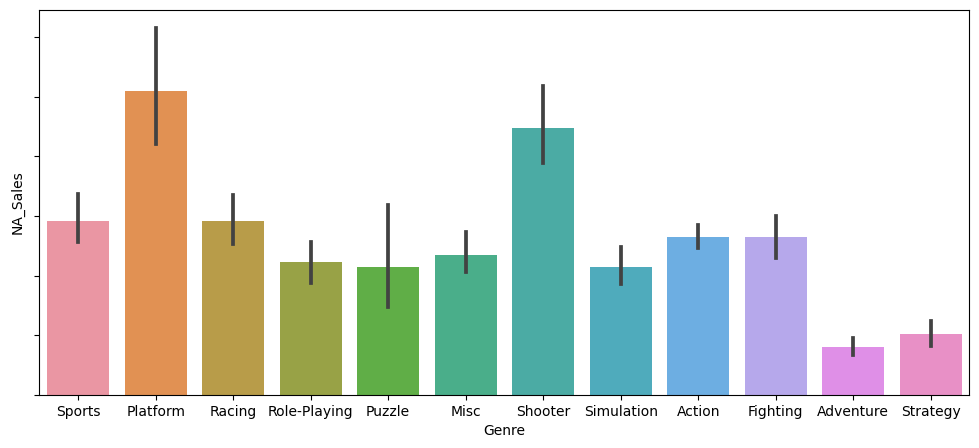

In [16]:
cat_num = df1['Genre']
print("Graph for : unique =", (len(cat_num)))
na_sales = df1["NA_Sales"]
plt.figure(figsize=(12,5))
chart = sns.barplot(y=na_sales, x=cat_num)
chart.set_yticklabels(chart.get_yticklabels())
plt.show()

Lets look at the Europe sales data, Here we have taken the genre with Europe game sales, which describes the popular games in the Europe it describes the highest amount of game which where popular by sales data. As we can see that **Shooter** Genre is more in demand in Europe. So comapanies or publishers can take these as note to relase Shooter based game more in Europe if there target is Europe region.

* The TOP 5 popular games genre in north america is

1. Shooter
2. Platform
3. Racing
4. Sports
5. Action

Graph for : unique = 16291


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


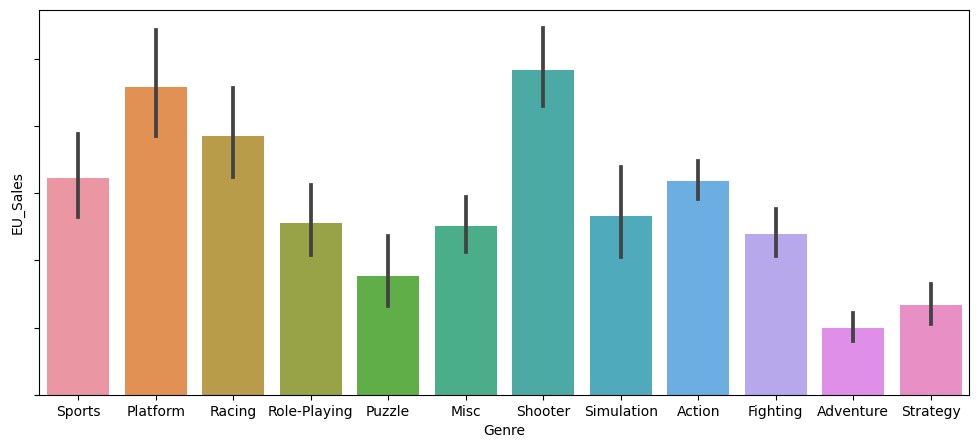

In [29]:
cat_num = df1['Genre']
print("Graph for : unique =", (len(cat_num)))
eu_sales = df1["EU_Sales"]
plt.figure(figsize=(12,5))
chart = sns.barplot(y=eu_sales, x=cat_num)
chart.set_yticklabels(chart.get_yticklabels())
plt.show()

Lets look at the Japan sales data, Here we have taken the genre with Japan game sales, which describes the popular games in the Japan it describes the highest amount of game which where popular by sales data. As we can see that **Role-Playing** Genre is more in demand in Japan. So comapanies or publishers can take these as note to relase Role-Playing based game more in Japan if there target is Japan region.

* The TOP 5 popular games genre in Japan is

1. Role-Playing
2. Platform
3. Fighting
4. Puzzle
5. Strategy

Graph for : unique = 16291


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


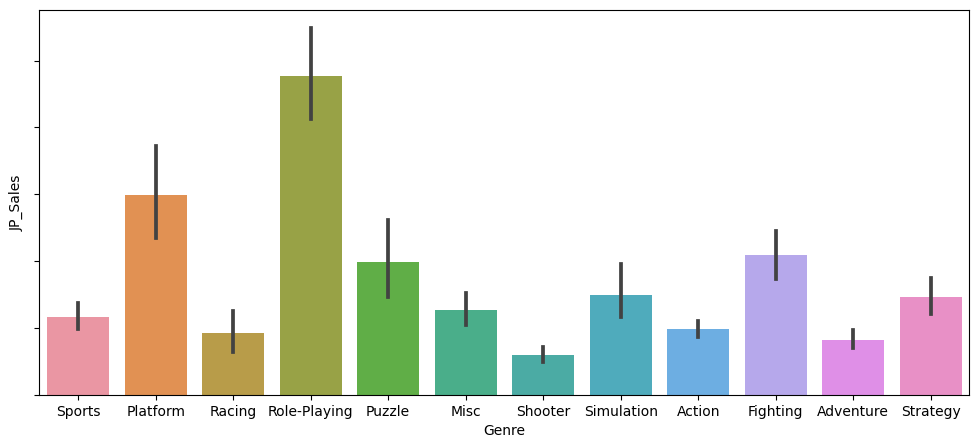

In [18]:
cat_num = df1['Genre']
print("Graph for : unique =", (len(cat_num)))
jp_sales = df1["JP_Sales"]
plt.figure(figsize=(12,5))
chart = sns.barplot(y=jp_sales, x=cat_num)
chart.set_yticklabels(chart.get_yticklabels())
plt.show()

Lets look at the Other Region sales data, Here we have taken the genre with Other-Region game sales, which describes the popular games in the Other-Region of world, it describes the highest amount of game which where popular by sales data. As we can see that **Shooter** Genre is more in demand in Other-Region. So comapanies or publishers can take these as note to relase Shooter based game more in Other-Region if there target is Other-Region.

* The TOP 5 popular games genre in Other Region are:

1. Shooter
2. Racing
3. Platform
4. Sports
5. Action

Graph for : 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


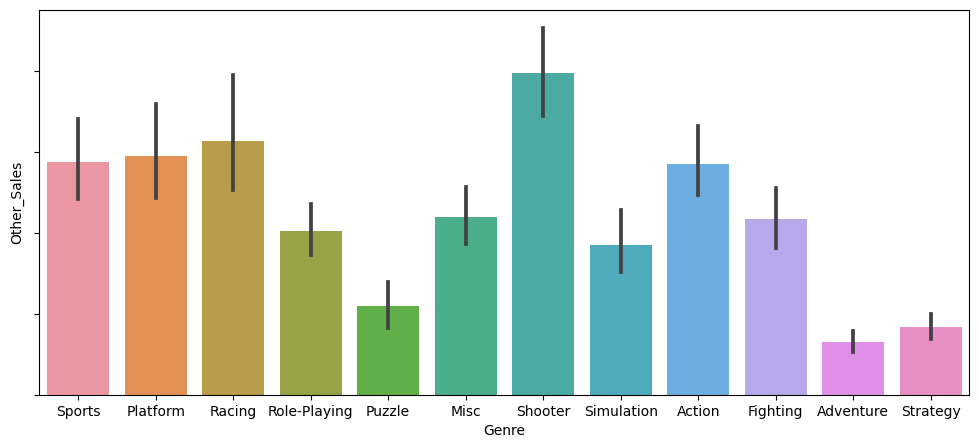

In [19]:
cat_num = df1['Genre']
print("Graph for : ")
ot_sales = df1["Other_Sales"]
plt.figure(figsize=(12,5))
chart = sns.barplot(y=ot_sales, x=cat_num)
chart.set_yticklabels(chart.get_yticklabels())
plt.show()

Lets look at the Global sales data, Here we have taken the genre with Global game sales, which describes the popular games  Globally, it describes the highest amount of game which where popular by sales data. As we can see that **Platform** Genre is more in demand Globally. So comapanies or publishers can take these as note to relase Platform based game more around the world if there target is to relase the game Globally.

* The TOP 5 popular games genre Globally are:

1. Platform
2. Shooter
3. Role-Playing
4. Racing
5. Sports

Graph for : unique = 16291


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


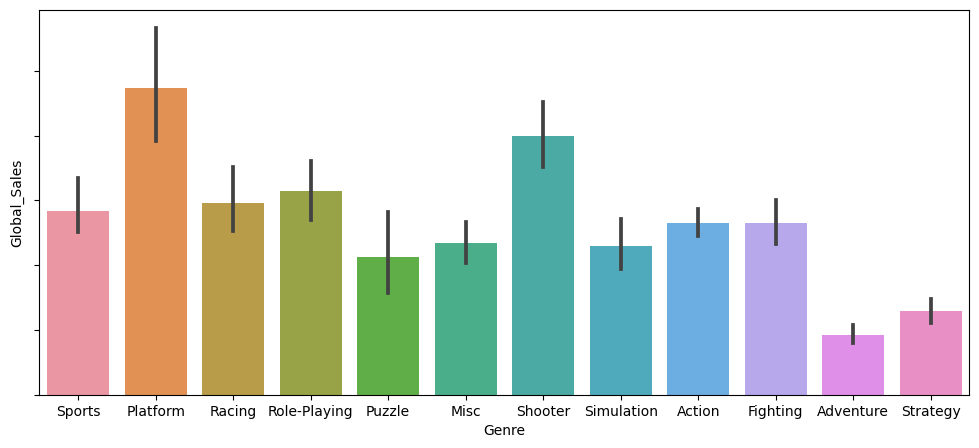

In [20]:
cat_num = df1['Genre']
print("Graph for : unique =", (len(cat_num)))
gb_sales = df1["Global_Sales"]
plt.figure(figsize=(12,5))
chart = sns.barplot(y=gb_sales, x=cat_num)
chart.set_yticklabels(chart.get_yticklabels())
plt.show()

Following given visulaization or chart is of Platfrom vs NA_Sales data from dataset which describes the amount of games released on the gaming platforms. As we can see that the highest amount of games were released on the NES platfrom in North America.

* The TOP 5 Gaming Platforms are in North America:

1. NES
2. GB
3. GEN
4. 2600
5. X360

Graph for : unique = 16291


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


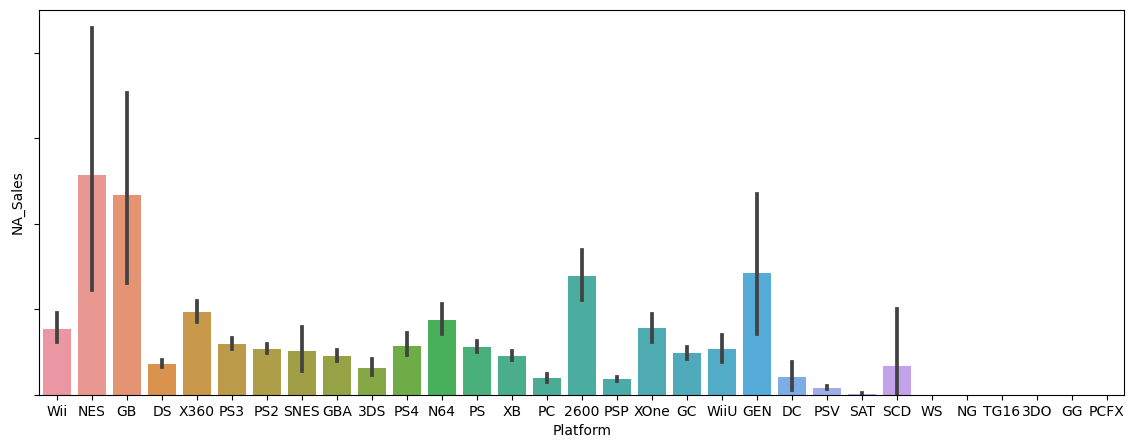

In [21]:
cat_num = df1['Platform']
print("Graph for : unique =", (len(cat_num)))
na_sales = df1["NA_Sales"]
plt.figure(figsize=(14,5))
chart = sns.barplot(y=na_sales, x=cat_num)
chart.set_yticklabels(chart.get_yticklabels())
plt.show()

Following given visulaization or chart is of Platfrom vs EU_Sales data from dataset which describes the amount of games released on the gaming platforms. As we can see that the highest amount of games were released on the NES platfrom in Europe.

* The TOP 5 Gaming Platforms are in Europe:
1. GB
2. PS4
3. PS3
4. X360
5. NES

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


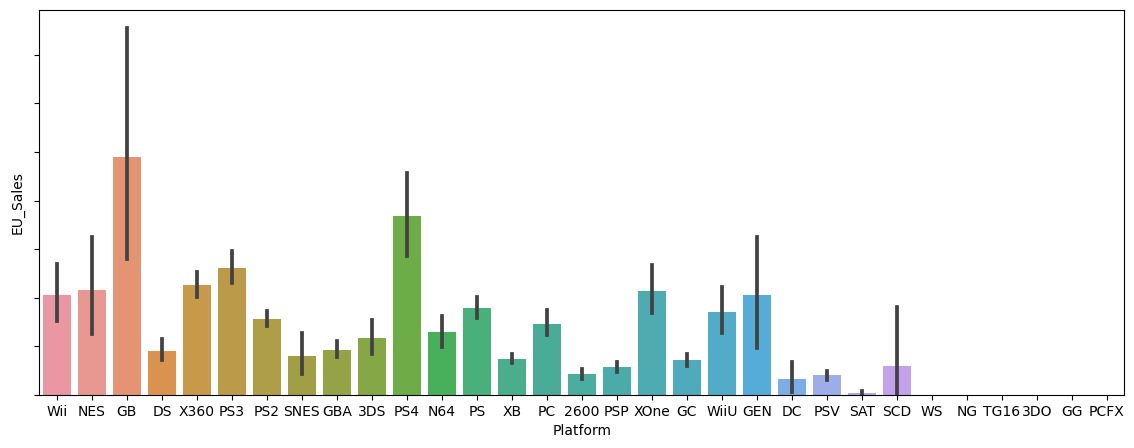

In [31]:
cat_num = df1['Platform']
eu_sales = df1["EU_Sales"]
plt.figure(figsize=(14,5))
chart = sns.barplot(y=eu_sales, x=cat_num)
chart.set_yticklabels(chart.get_yticklabels())
plt.show()



Following given visulaization or chart is of Platfrom vs JP_Sales data from dataset which describes the amount of games released on the gaming platforms. As we can see that the highest amount of games were released on the **NES** platfrom in **Japan**.

* The TOP 5 Gaming Platforms in japan are:
1. NES
2. GB
3. SNES
4. WS
5. SAT

Graph for : unique = 16291


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


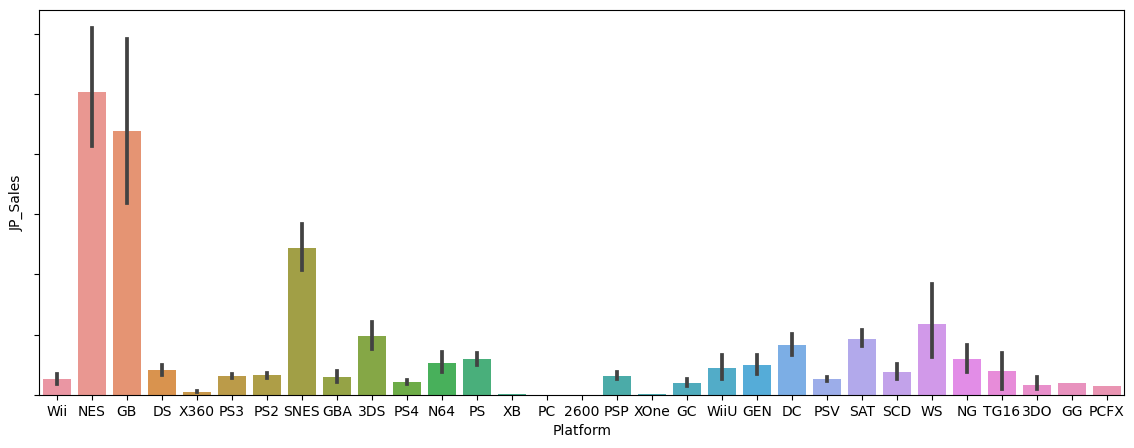

In [23]:
cat_num = df1['Platform']
print("Graph for : unique =", (len(cat_num)))
jp_sales = df1["JP_Sales"]
plt.figure(figsize=(14,5))
chart = sns.barplot(y=jp_sales, x=cat_num)
chart.set_yticklabels(chart.get_yticklabels())
plt.show()

Following given visulaization or chart is of Platfrom vs Other_Sales data from dataset which describes the amount of games released on the gaming platforms. As we can see that the highest amount of games were released on the PS4 platfrom in Europe.

* The TOP 5 Gaming Platforms in Other REgion of world are:
1. PS4
2. PS3
3. PS2
4. GB
5. Wii

Graph for : unique = 16291


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


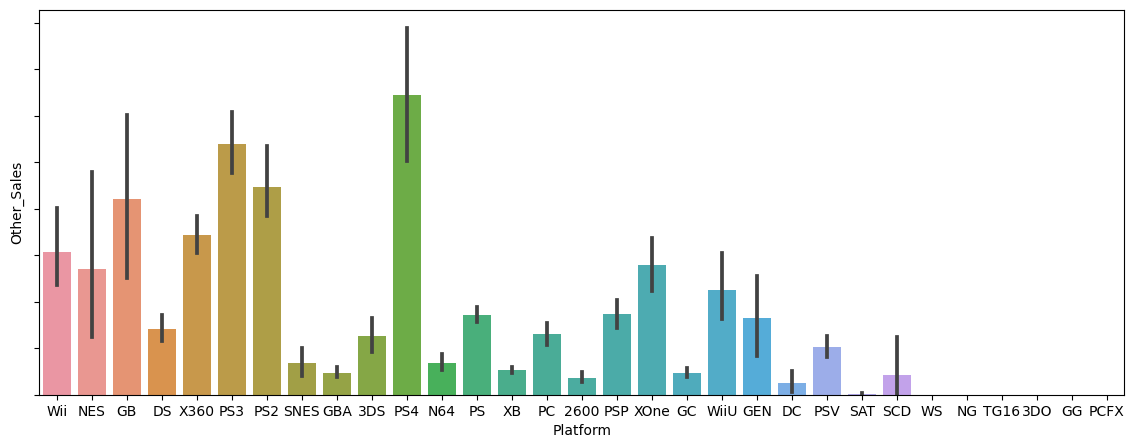

In [24]:
cat_num = df1['Platform']
print("Graph for : unique =", (len(cat_num)))
ot_sales = df1["Other_Sales"]
plt.figure(figsize=(14,5))
chart = sns.barplot(y=ot_sales, x=cat_num)
chart.set_yticklabels(chart.get_yticklabels())
plt.show()

Following given visulaization or chart is of Platfrom vs Global_Sales data from dataset which describes the amount of games released on the gaming platforms. As we can see that the highest amount of games were released on the GB platfrom Globally.

* The TOP 5 Gaming Platforms Globally are:
1. GB
2. NES
3. GEN
4. 2600
5. PS4

Graph for : unique = 16291


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


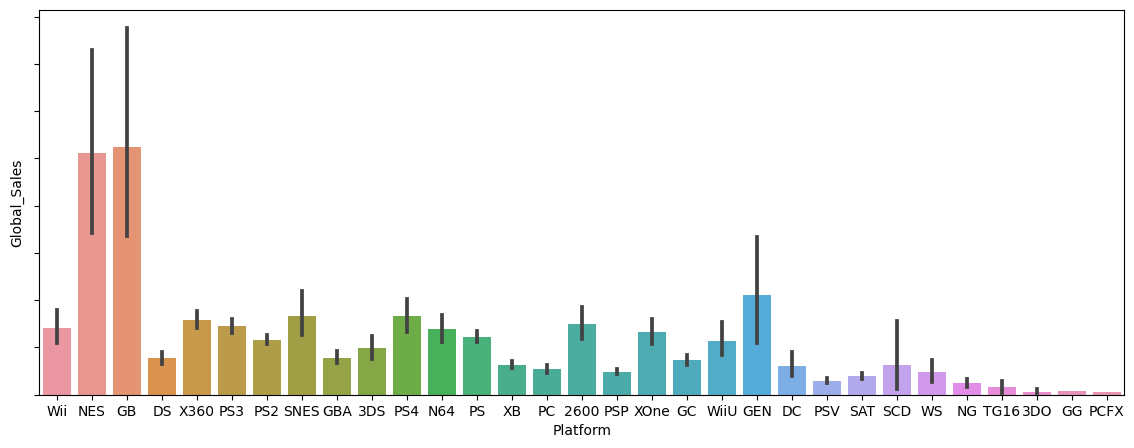

In [25]:
cat_num = df1['Platform']
print("Graph for : unique =", (len(cat_num)))
gb_sales = df1["Global_Sales"]
plt.figure(figsize=(14,5))
chart = sns.barplot(y=gb_sales, x=cat_num)
chart.set_yticklabels(chart.get_yticklabels())
plt.show()

# Conclusion
- Based Upon the given data, I've analyzed the dataset and created different visualizations based upon genre and the region the visualization is coded which you can see.
- Based on that visualization I've given the TOP 5 answers so that the stack holder can easily understand the requirements for the game development in those specific area.
